# Health data 

We want to study the impact of the most popular recipes on the health of people. To be able to achieve that goal we need some data about food related diseases. We chose to focus on overweight / obesity and diabetes in each region of the world. We got the data from the World Health Organization (WHO).

The datasets we chose to use are the following:
- percentage of overweight (BMI > 25) people in each country / world region
- percentage of obesity (BMI > 30) in each country / world region
- percentage of diabetes in each country / wolrd region

### Necessary imports, data paths and loading of datasets into dataframes

In [255]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json, csv

In [360]:
#Dataset paths
health_data_path = 'data/health/originals/'
project_health_data_path = 'data/health/project_adapted/'

#LOAD THE DATASETS

#Percentage of dying between the ages of 30-70 of cardiovascular and respiratory diseases, cancer, diabetes by country and region
mortality_country = pd.read_csv(project_health_data_path + 'NCDMORT3070.csv', skiprows = 1)
mortality_region = pd.read_csv(project_health_data_path + 'diseases_region.csv', skiprows = 1)

#Percentage of diabetes by country
diabetes_country = pd.read_csv(project_health_data_path + 'diabetes.csv', index_col = 0)
diseases_region = pd.read_csv(project_health_data_path + 'diseases.csv')

#Percentage of overweight by country and region
overweight_country = pd.read_csv(project_health_data_path + 'overweight_country.csv', index_col = 0)
overweight_region = pd.read_csv(project_health_data_path + 'overweight_region.csv', index_col = 0)

#Percentage of obesity by country and region
obesity_country = pd.read_csv(project_health_data_path + 'obesity_country.csv', index_col = 0)
obesity_region = pd.read_csv(project_health_data_path + 'obesity_region.csv', index_col = 0)

### Clean the data

In [258]:
#Set column names
newcols = ['Country', 'Year', 'Both sexes', 'Male', 'Female']
newcols1 = ['Country', 'Diabete percentage']
newcols2 = ['Region', 'Obesity percentage']
newcols3 = ['Region', 'Overweight percentage']
mortality_country.columns = newcols
mortality_region.columns = newcols
diabetes_country.columns = newcols1
obesity_region.columns = newcols2
overweight_region.columns = newcols3

In [259]:
overweight_country.shape

(195, 2)

In [260]:
overweight_country.isnull().values.any()

False

In [261]:
obesity_country.shape

(195, 2)

In [262]:
obesity_country.isnull().values.any()

False

In [263]:
diabetes_country.shape

(253, 2)

In [264]:
diabetes_country.isnull().values.any()

False

We find the same number of countries in the overweight and obesity datasets, we will merge this two along with the diabetes dataset, at first we choose to merge the first two dataframes and compare the countries with the diabetes dataset to check for any country names that might need to be changed.

In [265]:
#Merge overweight, obesity and diabetes data for each country on a single dataframe
result = pd.merge(overweight_country, obesity_country, on= 'Country')
result2 = pd.merge(result, diabetes_country, on='Country')
result2.head()

,Country,Overweight percentage,Obesity percentage,Diabete percentage
0,Afghanistan,19.7,4.5,9.59
1,Albania,58.7,22.3,10.08
2,Algeria,60.7,26.6,6.73
3,Andorra,68.1,28.0,7.97
4,Angola,23.9,6.8,3.94


# Why our interest to find any correlations between health markers and nutrition?

Noncommunicable diseases (NCDs) are the leading causes of death and were responsible for an estimated 39.5 million (72%) of the world’s 54.7 million deaths in 2016. Of the major NCDs, cardiovascular diseases (CVD) were the leading cause of NCD mortality in 2016 and was responsible for nearly half of all NCD deaths. Modifiable risk factors such as unhealthy diet, physical inactivity, tobacco use and harmful use of alcohol are major causes of CVDs. Dietary saturated fatty acids and trans-fatty acids are of particular concern as high levels of intake are correlated with increased risk of CVDs.

Saturated fatty acid and trans-fatty foods photoWHO/Pixabay
Saturated fatty acids are found in foods from animal sources such as butter, milk, meat, salmon, and egg yolks, and some plant-derived products such as chocolate and cocoa butter, coconut, palm and palm kernel oils. Trans-fatty acids can be industrially produced by the partial hydrogenation of vegetable and fish oils, but also occur naturally in meat and dairy products from ruminant animals (e.g. cattle, sheep, goats, camels, etc.). Industrially-produced trans-fatty acids can be found in baked and fried foods (e.g. doughnuts, cookies, crackers and pies), pre-packaged snacks and food, and partially hydrogenated cooking oils and fats which are often used at home, in restaurants, or in the informal sector, such as street vendors.

On the other hand, childhood obesity is one of the most serious global public health challenges of the 21st century, affecting every country in the world. In just 40 years the number of school-age children and adolescents with obesity has risen more than 10-fold, from 11 million to 124 million (2016 estimates). In addition, an estimated 216 million were classified as overweight but not obese in 2016.

The condition also affects younger children, with over 38 million children aged under 5 living with overweight or obesity in 2017. The epidemic has been growing most rapidly in low- and middle-income countries, particularly in Northern and Southern Africa, the Middle East and the Pacific Islands. Although most countries are still off-track to meet the 2025 targets, many are taking action and some have achieved a levelling-off in childhood obesity rates. Investing in children’s health will help meet the global health targets and substantially reduce the predicted health and economic costs of obesity.

### Let's start by analizing our data

In health studies is always interesting to define gender-specific biases especially in cardio-respiratories deseases where it has been shown that it affects 30% more the male population form ages 18-45.

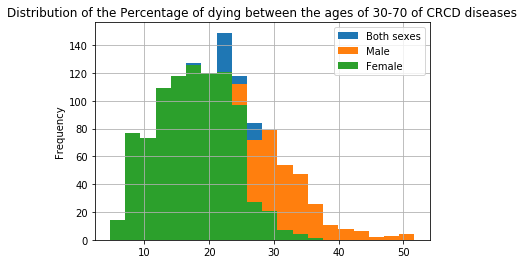

In [267]:
#Distribution of the percentage of dying of CRCD diseases by country
#Note: CRCD - Cardio-respiratory, cancer and diabetes

mortality_copy = mortality_country.copy()
mortality_copy.drop(['Year'], axis = 1, inplace = True)
mortality_copy.groupby(['Country']).mean()

#Plotting all
hx = mortality_copy.plot(kind = 'hist', bins = 20, grid = True, title = 'Distribution of the Percentage of dying between the ages of 30-70 of CRCD diseases' );


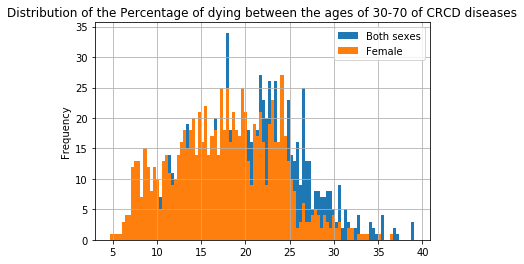

In [270]:
test = mortality_country.copy()
test.drop(['Year', 'Male'], axis = 1, inplace = True)
test.groupby(['Country']).apply(lambda x : x-15)

test.plot(kind = 'hist', bins = 100, grid = True, title = 'Distribution of the Percentage of dying between the ages of 30-70 of CRCD diseases' );


We thus, confirm that as the male population gets the older, the risk of somatizing one of the following diseases: 

Cardiovascular 

Respiratory

Cancer

Diabetes

Increases with respect to the female population from the ages 18-45. The frequency of deaths appears also higher in the eldest years of life and stops around 60 years old. We also visualize the fact that in most countries the percentage of dying form one of these diseases is the highest at around 25% which means that 25% of the population in most countries is dying from these disease. Thus, it is not really necessary to separate the male/female population as we only want an overwiew of the food choice related to the different countries.

The figure above shows the percentage of dying of CRCD diseases between the ages 30-70 for male and female populations. We observe that these diseases affect, by visual inspection, more the male population. The mean for both sexes is placed at around 22 percent.

### Now let's add our calculations for the nutriscore for our scraped international recipes and see if we find any interesting correlations

In [191]:
nutriscore = pd.read_csv('fullWithNutri.csv', index_col=0)
nutriscore.head()

,Calcium,Calories,Cholesterol,Dietary Fiber,Folate,Iron,Magnesium,Niacin,Popularity,Potassium,...,Thiamin,Title,Total Carbohydrates,Total Fat,Vitamin A,Vitamin B6,Vitamin C,VeggieWeight,NutriScore,NutriLetter
Low-Carb Jicama Tostadas,18.0,57,0.0,7.4,18.0,1.0,18.0,0.0,3.0,225.0,...,0.0,Low-Carb Jicama Tostadas,13.2,0.1,32IU,0.0,30.0,0.0,-2,A
Best Fish Tacos,80.0,322,35.0,3.8,88.0,3.0,48.0,6.0,3.0,591.0,...,0.0,Best Fish Tacos,34.6,9.0,1043IU,0.0,18.0,145.0,-1,A
Crispy Pork Carnitas,35.0,317,89.0,0.4,5.0,2.0,23.0,10.0,267.0,371.0,...,1.0,Crispy Pork Carnitas,2.1,22.6,17IU,0.0,2.0,16.0,2,B
Jeannie's Vegetarian Enchiladas,376.0,626,59.0,9.6,193.0,6.0,77.0,8.0,1.0,818.0,...,1.0,Jeannie's Vegetarian Enchiladas,67.2,31.2,2569IU,0.0,49.0,172.0,2,B
Mexican Corn Bread Casserole,168.0,304,101.0,1.9,58.0,2.0,28.0,6.0,21.0,372.0,...,0.0,Mexican Corn Bread Casserole,21.5,16.3,840IU,0.0,12.0,58.0,2,B


The Nutriscore is a standard way of measuring the nutritious value of any given plate/recipe/food and standardizes these values regardless of a possible existance of high levels of sugars, fats, ot proteins as a given recipe can contain high amounts of fruits and vegetables and still contain a high sugar consumption for example.

Nowadays, public health institutions, diet fads and regimes, and the whole fitness industries have recognized the importance of a low-sugar healthy-based diet. In the following results and calculation we will map certain macronutrients deem as crucial to the development of health-related markers with respect to cardio-respiratory, cancer and diabetes in both countries and regions of the world.

Let's start by calculation the ratio of sugar to calories. To do so, a sugar is considered to have 4 kcal/g thus for each gram of sugar we have 4 kcal of energy. We will also explore the prevalence of saturated fats and protein content, fats are assumed to have 9kcal/g and protein 4kcal/g.

In [563]:
#Sugar consumption

##For sugar consumption we calculate the ratio of sugar to the number of calories
nutriscore['Sugar Consumption'] = nutriscore['Sugars']*4/nutriscore['Calories']*100

##We take the food for which their sugar content is >= 25% 
sugar_region = nutriscore[nutriscore['Sugar Consumption'] >= 25][['Region', 'Sugar Consumption']].groupby('Region').mean()
sugar_region.reset_index(level=0, inplace=True)

## Ratio Saturated fats/calories
total_cals = nutriscore.groupby('Region')['Calories'].mean()
fats = nutriscore.groupby('Region')['Saturated Fat'].mean().apply(lambda x: x*9)/total_cals*100

##Ratio protein/calories
proteins = nutriscore.groupby('Region')['Protein'].mean().apply(lambda x: x*4)/total_cals*100

##NutriScore
nutri = nutriscore.groupby('Region')['NutriScore'].mean()

### Is a high consumption of sugar a real indicator of obesity, overweight or diabetes prevalence in the regions of the world?

In [328]:
old_regions = ['australian-and-new-zealander', 'canadian', 'chinese', 'east-african', 'eastern-european',
            'german', 'scandinavian', 'south-american', 'spanish', 'thai']
new_regions = ['Western Pacific', 'Americas', 'South-East Asia', 'Africa', 
            'Eastern-Mediterranean', 'Europe', 'Europe', 'Americas', 'Europe', 
            'South-East Asia' ]
sugar_region['Region'].replace(old_regions, new_regions, inplace = True)
sugar_region = sugar_region.groupby(['Region']).mean()
sugar_region.reset_index(level=0, inplace=True)
obesity_region = obesity_region.drop(obesity_region.index[len(obesity_region)-1])
overweight_region = overweight_region.drop(overweight_region.index[len(overweight_region)-1])

In [213]:
result0 = pd.merge(obesity_region, sugar_region, on = 'Region')
result1 = pd.merge(result0, overweight_region, on = 'Region')

Text(0.5,0,'5 Regions of the World')

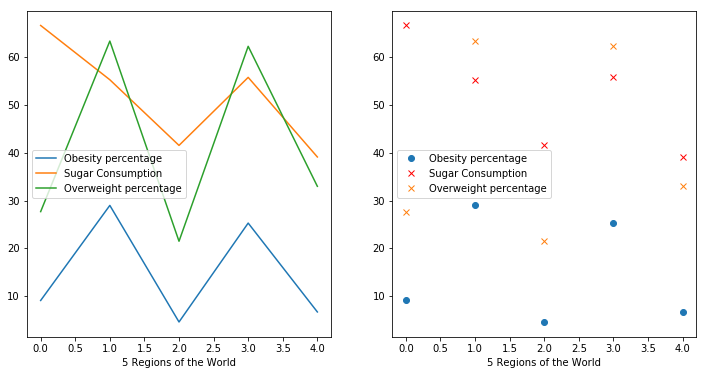

In [368]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,6))
ax1 = result1.plot(ax=axes[0])
ax1.set_xlabel("5 Regions of the World")
ax2 = result1.plot(ax=axes[1], style=['o','rx', 'x'])
ax2.set_xlabel("5 Regions of the World")

Let's finish this section by calculation the **Pearson coefficient** out of these values and confirm our results.

In [241]:
result1.corr()

,Obesity percentage,Sugar Consumption,Overweight percentage
Obesity percentage,1.000000,0.416353,0.979070
Sugar Consumption,0.416353,1.000000,0.296885
Overweight percentage,0.979070,0.296885,1.000000


What's up with these results? Clearly there is no surprise and there's an almost perfect positive Pearson correlation between obesity and overweight per region of the world. **However, there's no clear evidence that a higher consumption of sugar found on the most popular dishes of the different regions of the world plays a role on the obesity or overweight percentage in the same region.**

The latter is due to the fact that we don't have a lot of different recipes, also the sugar content was placed at 25% of sugar contained in the recipe and while this is an important assumption there is clearly no need to look for further information regarding this aspect, we will continue our study in the quest of predicting health-related conditions from our recipe data.

### Is a high consumption of saturated fats and protein content a real indicator of obesity, overweight or diabetes prevalence in the countries of the world?

In [389]:
fat_prot = pd.concat([fats, proteins, nutri], axis=1).reset_index()
fat_prot.drop([3,4,13], inplace=True)
fat_prot.columns = ['Region', 'Saturated fat', 'Protein content', 'NutriScore']

In [390]:
result_region = pd.merge(diseases_region, fat_prot, on = 'Region')
result_region.head()

,Region,Overweight percentage,Obesity percentage,Diabetes percentage,Mortality,Saturated fat,Protein content,NutriScore
0,australian-and-new-zealander,67.2,30.4,5.07,9.1,15.593452,16.076398,2.052632
1,canadian,67.5,31.3,7.37,9.8,16.313505,18.238448,2.050000
2,chinese,33.8,6.6,9.74,17.0,8.923850,26.060286,0.600000
3,french,62.9,23.2,4.77,10.6,29.679144,17.956031,2.421053
4,german,62.8,25.7,5.06,12.1,14.169550,17.979239,1.222222


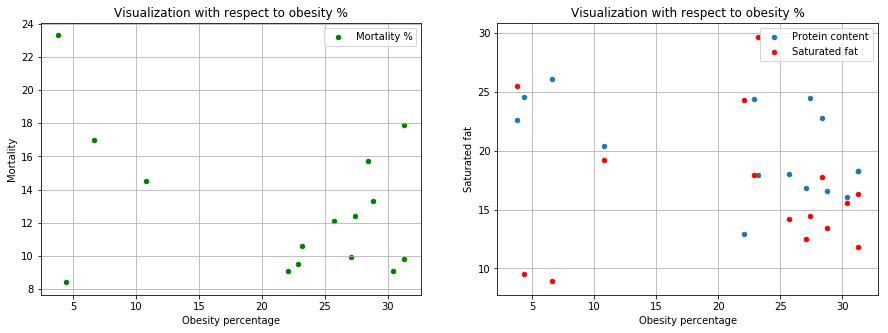

In [454]:
#Visualization with respect to obesity
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))

ax1 = result_region.plot(kind = 'scatter', ax=axes[0], x = 'Obesity percentage', y = 'Mortality', label = 'Mortality %', color = 'g', grid = True, title = "Visualization with respect to obesity %")
ax2 = result_region.plot(kind = 'scatter', x = 'Obesity percentage', y = 'Protein content', label = 'Protein content', ax = axes[1], grid = True)
ax3 = result_region.plot(kind = 'scatter', x = 'Obesity percentage', y = 'Saturated fat', label = 'Saturated fat', ax = axes[1], color = 'r', grid = True, title = "Visualization with respect to obesity %")

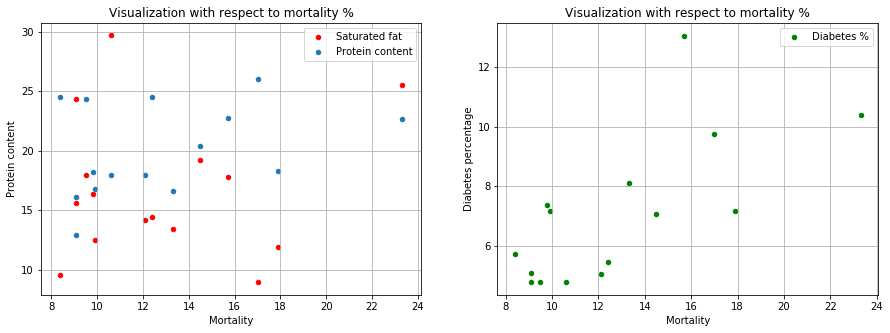

In [455]:
#Visualization with respect to mortality
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))

ax1 = result_region.plot(kind = 'scatter', ax=axes[0], x = 'Mortality', y = 'Saturated fat', label = 'Saturated fat', color = 'r', grid = True, title = "Visualization with respect to mortality %")
ax2 = result_region.plot(kind = 'scatter', x = 'Mortality', y = 'Protein content', label = 'Protein content', ax = axes[0], grid = True)
ax3 = result_region.plot(kind = 'scatter', x = 'Mortality', y = 'Diabetes percentage', label = 'Diabetes %', ax = axes[1], color = 'g', grid = True, title = "Visualization with respect to mortality %")

We proposed to two different visualizations, the first one with respect the obesity percentage. We see no clear correlation between a higher consumption of saturated fats or protein. However, for a high percentage of obesity in the regions there is a small cluster of regions that have high tendancy of mortality. On the second figure we observe the consumption of satrated fats and protein a long a mortality axis. Again it is not possible to draw any conclusions from this visualization.

Let's calculate the correlation matrix between our variables:

In [391]:
result_region.corr()

,Overweight percentage,Obesity percentage,Diabetes percentage,Mortality,Saturated fat,Protein content,NutriScore
Overweight percentage,1.000000,0.971822,-0.313933,-0.496330,-0.044760,-0.497910,0.050246
Obesity percentage,0.971822,1.000000,-0.193628,-0.361304,-0.049713,-0.539843,-0.019222
Diabetes percentage,-0.313933,-0.193628,1.000000,0.696534,-0.093171,0.345717,-0.474333
Mortality,-0.496330,-0.361304,0.696534,1.000000,0.092514,0.333359,-0.542228
Saturated fat,-0.044760,-0.049713,-0.093171,0.092514,1.000000,-0.294427,0.527613
Protein content,-0.497910,-0.539843,0.345717,0.333359,-0.294427,1.000000,-0.492726
NutriScore,0.050246,-0.019222,-0.474333,-0.542228,0.527613,-0.492726,1.000000


### **What about the nutriscore?** Let's see how the nutriscore is represented in the diferent regions of the world...

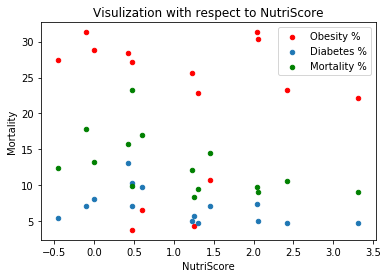

In [392]:
#Visualization with respect to NutriScore
ax1 = result_region.plot(kind = 'scatter', x = 'NutriScore', y = 'Obesity percentage', label = 'Obesity %', color = 'r', title = "Visulization with respect to NutriScore")
ax2 = result_region.plot(kind = 'scatter', x = 'NutriScore', y = 'Diabetes percentage', label = 'Diabetes %', ax = ax1)
ax3 = result_region.plot(kind = 'scatter', x = 'NutriScore', y = 'Mortality', label = 'Mortality %', ax = ax1, color = 'g')

### Why do we obtain these results? 

It is clear that a healthy diet and exercise are essential for a long, fulfilling live. But it is not always the quality of the food and its macronutrients who will determine health-related condition all over the world. The socio-economic impact on the health of the people is extremely significant. As you will see in the next study case. Several regions of the world have a low obesity and low consumption of sugars and saturated fats however their mortality is on the other side of the spectrum. Regions of the world, namely Africa, Asia and South America suffer from extreme poverty and food is not available to them. It thus, very difficult to get any interesting correlation from these databases. However, we were able to prove how the male population sufferes from cardio-respiratory diseases in a higher frequency than women. It will be interesting to showcase our case study and compare the health markers, sugar and fat consumption of a well established country: Canda

# Case Study: Canada

In [401]:
canadian_recipes = nutriscore[nutriscore['Region'] == 'canadian'].reset_index()
canadian_recipes.head()

,index,Calcium,Calories,Cholesterol,Dietary Fiber,Folate,Iron,Magnesium,Niacin,Popularity,...,Title,Total Carbohydrates,Total Fat,Vitamin A,Vitamin B6,Vitamin C,VeggieWeight,NutriScore,NutriLetter,Sugar Consumption
0,The Best Rolled Sugar Cookies,14.0,109,25.0,0.3,21.0,1.0,3.0,1.0,15000.0,...,The Best Rolled Sugar Cookies,14.7,5.0,158IU,0.0,0.0,0.0,1,B,25.688073
1,Butternut Squash Soup II,178.0,305,21.0,9.5,111.0,3.0,136.0,6.0,3000.0,...,Butternut Squash Soup II,59.7,6.8,35991IU,1.0,89.0,232.0,0,B,13.114754
2,Old Fashioned Onion Rings,265.0,641,69.0,3.5,146.0,4.0,40.0,8.0,1000.0,...,Old Fashioned Onion Rings,68.3,34.6,256IU,0.0,4.0,37.0,5,C,4.992200
3,Crispy Orange Beef,122.0,507,60.0,5.9,197.0,5.0,79.0,11.0,1000.0,...,Crispy Orange Beef,59.2,18.7,1280IU,1.0,189.0,10.0,0,B,13.412229
4,Boneless Buffalo Wings,131.0,710,136.0,1.7,89.0,4.0,41.0,15.0,1000.0,...,Boneless Buffalo Wings,43.7,46.9,751IU,0.0,15.0,0.0,6,C,2.253521


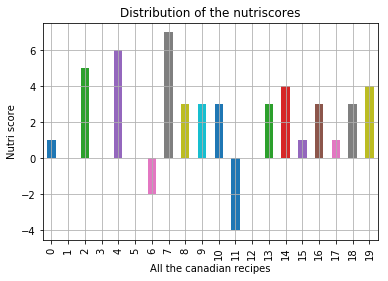

In [412]:
ax = canadian_recipes['NutriScore'].plot(kind = 'bar', grid = True, title = 'Distribution of the nutriscores')
ax.set_xlabel("All the canadian recipes");
ax.set_ylabel("Nutri score");

First of all, as a remainder, the recipe is considered healthy when the nutriscore is negative and unhealthy when its positive. We observe a higher number of unhealthy recipes in the canadian traditional cuisine.

### Let's visualize how the nutriscores of the canadian recipes compare to the rest

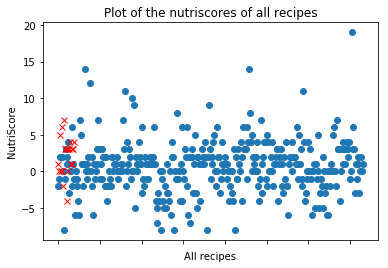

In [440]:
hx1 = nutriscore['NutriScore'].plot(style=['o'], title = "Plot of the nutriscores of all recipes")
hx2 = canadian_recipes['NutriScore'].plot(style=['rx'], label = 'Canadian recipes', ax = hx1)
hx2.set_xlabel("All recipes");
hx2.set_ylabel("NutriScore");

As seen above, the nutriscore of the canadian recipes is set around the mean value of the other recipes, all clustered around the [-5, 5] region

In [416]:
diseases_region[diseases_region['Region'] == 'canadian']

,Region,Overweight percentage,Obesity percentage,Diabetes percentage,Mortality
1,canadian,67.5,31.3,7.37,9.8


To continue our analysis, we will explore how the different health-related markers are presented over the world, here we use the median as a method to avoid extreme values present in regions such as african or asian countries.

In [556]:
params_health = ['Overweight percentage', 'Obesity percentage', 'Diabetes percentage', 'Mortality', 'Sugar Consumption', 
                'Saturated fat', 'NutriScore']

#Calculate WORLD median values
overweight_m = diseases_region['Overweight percentage'].median()
obesity_m = diseases_region['Obesity percentage'].median()
diabetes_m = diseases_region['Diabetes percentage'].median()
mortality_m = diseases_region['Mortality'].median()
sugar_m = nutriscore['Sugar Consumption'].median()
fat_m = nutriscore['Saturated Fat'].median()
nutriscore_m = nutriscore['NutriScore'].median()
world_values = [overweight_m, obesity_m, diabetes_m, mortality_m, sugar_m, fat_m, nutriscore_m]

#Calculate CANADIAN values
canada_values = diseases_region[diseases_region['Region'] == 'canadian']
overweight_c = canada_values['Overweight percentage'].mean()
obesity_c = canada_values['Obesity percentage'].mean()
diabetes_c = canada_values['Diabetes percentage'].mean()
mortality_c = canada_values['Mortality'].mean()
sugar_c = canadian_recipes['Sugar Consumption'].mean()
fat_c = canadian_recipes['Saturated Fat'].mean()
nutriscore_c = canadian_recipes['NutriScore'].mean()
canada_values = [overweight_c, obesity_c, diabetes_c, mortality_c, sugar_c, fat_c, nutriscore_c]

In [562]:
list = world_values + canada_values

canada_world = pd.DataFrame(np.row_stack([world_values, canada_values]), 
                               columns=params_health)
canada_world

,Overweight percentage,Obesity percentage,Diabetes percentage,Mortality,Sugar Consumption,Saturated fat,NutriScore
0,64.1,26.4,6.395,11.5,5.228758,5.0,1.00
1,67.5,31.3,7.370,9.8,13.035867,7.1,2.05


## Is the nutriscore a real indicator of health-related markers in countries?